# 딥러닝(DNN)을 이용한 MNIST 손글씨 인식 

### MNIST 손글씨 데이타 셋

<img src="./img/mnist_data.png" align=left width=500>

- MNIST 데이터셋은 미국 국립표준기술원(NIST)이 고등학생과 인구조사국 직원등이 쓴 손글씨를 이용해 만든 데이터로 구성
- 70,000개의 28*28 글자 이미지에 각각 0부터 9까지 이름표를 붙인 데이터셋
- 70,000개 = 60,000개의 학습 데이타셋 + 10,000개의 테스트 데이타셋으로 구성

In [1]:
# 경고 무시
import warnings
warnings.filterwarnings('ignore')

### 1. 데이타 불러오기
- 텐서플로우 저장소에서 MNIST 데이터셋 다운로드

In [2]:
# 텐서플로우 저장소에서 데이터를 다운 받기
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data(path='mnist.npz')

11490434/11490434 [==============================] - 0s 0us/step


### 1) 데이터의 형태 확인하기

In [3]:
# 학습 데이타, 테스트 데이터 확인하기
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[:1]

array([5], dtype=uint8)

### 2) 데이터 시각화

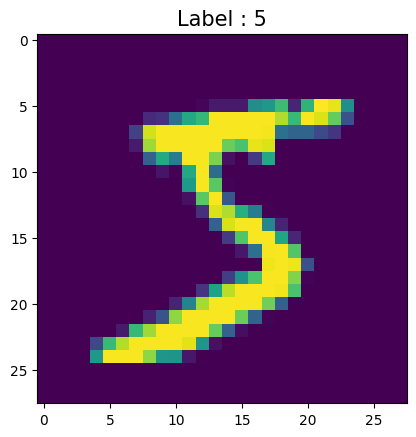

In [6]:
# 그래프로 확인 
import matplotlib.pyplot as plt

plt.imshow(X_train[0]) 
plt.title('Label : %d' % (y_train[0]), fontsize=15)
plt.show()

- cmap = 'Greys' 옵션을 지정해 흑백으로 출력

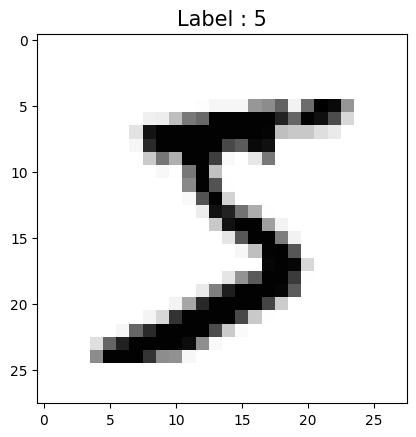

In [7]:
# 그래프로 확인 - 흑백
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys') # 흑백 출력
plt.title('Label : %d' % (y_train[0]), fontsize=15)
plt.show()

### 3) 코드로 이미지 확인하기
- 이미지는 가로 28 × 세로 28 = 총 784개의 픽셀로 이루어져 있음
- 각 픽셀은 밝기 정도에 따라 0부터 255까지 의 등급을 매김
- 흰색 배경이 0, 글씨가 들어간 곳은 0~255까지 숫자 중 하나로 채워져 긴 행렬로 이루어진 하나의 집합으로 변환

In [8]:
# 코드로 확인
import sys

for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


### 2. 검증 데이터셋 만들기
- 학습 데이타셋을 학습 데이타셋과 검증 데이타셋으로 분리

In [9]:
# 학습 데이타셋과 검증 데이터셋을 0.7:0.3의 비율로 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                 test_size=0.3,
                                                 random_state=0)

In [10]:
print(f'학습 데이터: {X_train.shape}, 레이블: {y_train.shape}')
print(f'검증 데이터: {X_val.shape}, 레이블: {y_val.shape}')
print(f'테스트 데이터: {X_test.shape}, 레이블: {y_test.shape}')

학습 데이터: (42000, 28, 28), 레이블: (42000,)
검증 데이터: (18000, 28, 28), 레이블: (18000,)
테스트 데이터: (10000, 28, 28), 레이블: (10000,)


### 3. 데이터 전처리
### 1) 피쳐 데이터 전처리 - 정규화
- 모델 입력을 하기 위해 피쳐 데이타 전처리 --> 정규화 이용
- 2차원 이미지 데이타(28, 28) -> 1차원으로 변경(28*28=784) -> RGB(0~ 255)의 최대값인 255로 나눈다.

#### 참고) numpy의 reshape(), flatten() 함수를 이용한 1차원으로 변경

In [15]:
# numpy의 reshape() 함수
import numpy as np
arr1 = np.arange(10)
print(arr1, arr1.shape, arr1.ndim) 
print('-'*50)

# 2차원으로 변경
arr2 = arr1.reshape(2, -1)
print(arr2, arr2.shape, arr2.ndim) 
print('-'*50)

# 1차원으로 변경1
arr3 = arr2.reshape(-1)
print(arr3, arr3.shape, arr3.ndim)
print('-'*50)

# 1차원으로 변경2
arr4 = arr2.flatten()
print(arr4, arr4.shape, arr4.ndim)

[0 1 2 3 4 5 6 7 8 9] (10,) 1
--------------------------------------------------
[[0 1 2 3 4]
 [5 6 7 8 9]] (2, 5) 2
--------------------------------------------------
[0 1 2 3 4 5 6 7 8 9] (10,) 1
--------------------------------------------------
[0 1 2 3 4 5 6 7 8 9] (10,) 1


In [17]:
# 피쳐 데이타 전처리 - 1차원 변경 --> 정규화 
num_x_train = X_train.shape[0]
num_x_val = X_val.shape[0]
num_x_test = X_test.shape[0]
print(num_x_train, num_x_val, num_x_test)

# 1) 데이터를 2차원(28, 28)에서 1차원(28*28=784)으로 변경
# 2) 모델의 입력으로 사용하기 위한 피쳐 전처리 - 정규화
X_train = X_train.reshape((num_x_train, 28*28)) / 255
X_val = X_val.reshape((num_x_val, 28*28)) / 255
X_test = X_test.reshape((num_x_test, 28*28)) / 255

# 1차원으로 변경 확인
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

42000 18000 10000
(42000, 784)
(18000, 784)
(10000, 784)


In [18]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### 2) 레이블(클래스) 전처리 - 원-핫 인코딩 형태로 변경
- 다중 분류(0~9)를 진행하므로 레이블을 원-핫 인코딩 형태로 변경

In [19]:
from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태의 원-핫 인코딩 형태로 변경
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [20]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 4. 모델 정의

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 생성
model = Sequential()
model.add(Dense(64, input_shape=(784, ), activation='relu')) # 입력층 - 784개 1차원, 은닉층1 - 64노드, 활성화함수 - relu
model.add(Dense(32, activation='relu'))    # 은닉층2 - 32노드, 활성화함수 - relu
model.add(Dense(10, activation='softmax')) # 출력층 - 10개(0~9)의 출력, 활성화함수 - softmax(다중분류)

In [22]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


- Param #
    - 1) 입력 + 은닉층1(dense) = 784(입력) X 64(노드) + 64(biases) = 50,240개
    - 2) 은닉층2(dense_1) = 64(은닉층1 노드) X 32(은닉층2 노드) + 32(biases) = 2,080개
    - 3) 출력층 = 32(은닉층2 노드) X 10(출력갯수) + 10(biases) = 330개

### 5. 컴파일 설정 : model.compile()
- 1) 손실 함수 : 다중분류 - 'categorical_crossentropy'
- 2) 옵티마이저(최적화 함수) : 'adam'
- 3) 모니터링 할 평가지표 : 정확도 - 'acc'

In [23]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics = ['acc'])

### 6. 모델 학습하기 : model.fit()
- 1) 에포크 설정 : 30번 반복 실행
- 2) 배치 사이즈 설정 : 128 사이즈로 잘라서 실행

In [24]:
history = model.fit(X_train, y_train,
                   epochs=30,
                   batch_size=128,
                   validation_data=(X_val, y_val))

Epoch 1/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4832 - acc: 0.8666 - val_loss: 0.2507 - val_acc: 0.9278
Epoch 2/30
329/329 [==============================] - 1s 2ms/step - loss: 0.2047 - acc: 0.9404 - val_loss: 0.1812 - val_acc: 0.9475
Epoch 3/30
329/329 [==============================] - 1s 2ms/step - loss: 0.1537 - acc: 0.9558 - val_loss: 0.1467 - val_acc: 0.9583
Epoch 4/30
329/329 [==============================] - 1s 2ms/step - loss: 0.1256 - acc: 0.9636 - val_loss: 0.1338 - val_acc: 0.9607
Epoch 5/30
329/329 [==============================] - 1s 2ms/step - loss: 0.1066 - acc: 0.9685 - val_loss: 0.1278 - val_acc: 0.9633
Epoch 6/30
329/329 [==============================] - 1s 2ms/step - loss: 0.0919 - acc: 0.9734 - val_loss: 0.1283 - val_acc: 0.9622
Epoch 7/30
329/329 [==============================] - 1s 2ms/step - loss: 0.0810 - acc: 0.9759 - val_loss: 0.1193 - val_acc: 0.9653
Epoch 8/30
329/329 [==============================] - 1s 2ms/step - loss: 0.

### 7. 모델 평가

### 1) 모델 평가 - model.evaluate() 함수 이용

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1512 - acc: 0.9689


[0.1512378454208374, 0.9689000248908997]

- 테스트 데이타셋 결과: 정확도 - 97%

In [26]:
model.evaluate(X_train, y_train)

1313/1313 [==============================] - 1s 1ms/step - loss: 0.0050 - acc: 0.9989


[0.004994072485715151, 0.9989285469055176]

### 2) 혼동 행렬을 이용한 모델 평가

313/313 [==============================] - 0s 885us/step


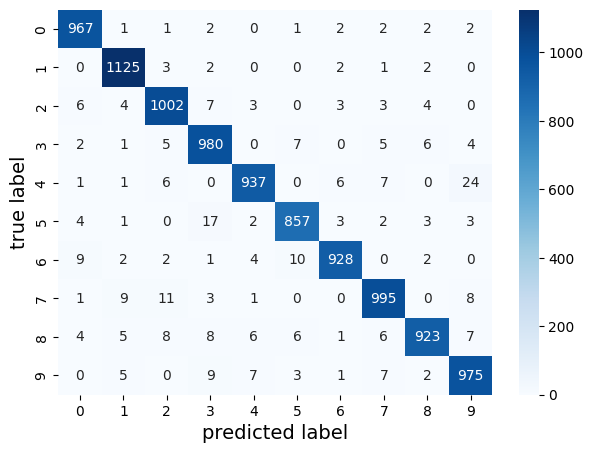

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

results = model.predict(X_test) # y_test의 예측값

# y_test의 실제 정답과 예측값으로 혼동 행렬 생성
plt.figure(figsize = (7, 5))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label', fontsize = 14)
plt.ylabel('true label', fontsize = 14)
plt.show()

### 3) 분류 보고서를 이용한 모델 평가 

In [30]:
print(classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.98      0.95      0.96       982
           5       0.97      0.96      0.97       892
           6       0.98      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.95      0.96       974
           9       0.95      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### 8. 학습 과정 시각화

In [31]:
# history를 통해 확인해볼 수 있는 값
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

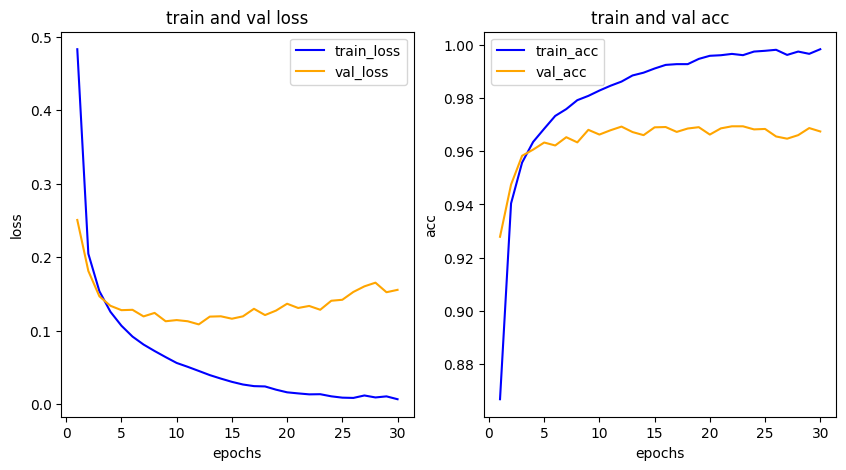

In [32]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 
epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

### 9. 학습된 모델을 통해 값 예측하기

### 1) 예측

In [33]:
import numpy as np

results = model.predict(X_test)
print(results.shape)
print(f'각 클래스에 속할 확률: \n{results[0]}')
print(f'예상 클래스: {results[0].argmax()}')
print(f'예상 클래스 확률: {round(results[0][results[0].argmax()]*100, 2)}%')

313/313 [==============================] - 0s 876us/step
(10000, 10)
각 클래스에 속할 확률: 
[5.0635385e-10 5.4146848e-10 4.2027062e-07 2.9993125e-06 1.3238967e-14
 4.2445817e-14 8.8516366e-17 9.9999654e-01 5.3387866e-10 6.0223551e-09]
예상 클래스: 7
예상 클래스 확률: 100.0%


### 2) 예측값을 그림으로 확인해보기

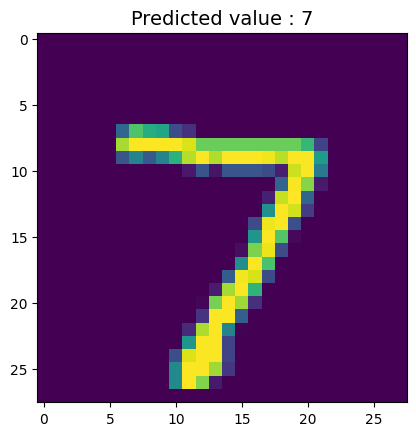

In [34]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.
plt.imshow(X_test[0].reshape(28, 28))
plt.title('Predicted value : ' + str(arg_results[0]), fontsize = 14)
plt.show()

### [전체 코드]

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
tf.random.set_seed(0)

# 1. 데이타 로드
(X_train, y_train), (Xest, y_test) = load_data(path='mnist.npz')

# 2. 검증 데이타 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size = 0.3, 
                                                  random_state = 0)
# 3. 피쳐 정규화/레이블 원-핫 인코딩
num_x_train = X_train.shape[0]
num_x_val = X_val.shape[0]
num_x_test = X_test.shape[0]

X_train = (X_train.reshape((num_x_train, 28 * 28))) / 255
X_val = (X_val.reshape((num_x_val, 28 * 28))) / 255
X_test = (X_test.reshape((num_x_test, 28 * 28))) / 255

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# 4. 딥러닝 모델 정의
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (784, )))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# 5. 컴파일 설정
model.compile(optimizer='adam', 
              loss = 'categorical_crossentropy', 
              metrics=['acc'])

# 6. 모델 학습
history = model.fit(X_train, y_train, 
                    epochs = 30, 
                    batch_size = 128, 
                    validation_data = (X_val, y_val))

# 7. 모델 평가
model.evaluate(X_test, y_test)